<a href="https://colab.research.google.com/github/yess-wee/DAUP/blob/main/exp2MLDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
dataset = pd.read_csv("/content/data.csv")
dataset


,srno,number of components,years of maintainence
0,1,1,23
1,2,2,29
2,3,4,64
3,4,4,72
4,5,4,80
5,6,5,87
6,7,6,96
7,8,6,105
8,9,8,127
9,10,8,119


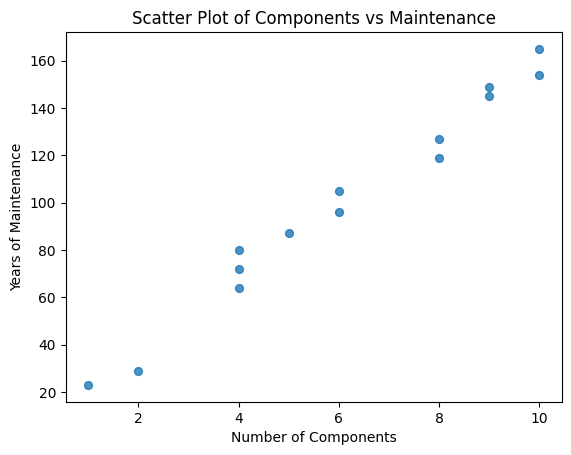

In [25]:
from matplotlib import pyplot as plt

# Plot scatter plot for initial data visualization
plt.scatter(dataset['number of components'], dataset['years of maintainence'], s=32, alpha=0.8)
plt.xlabel('Number of Components')
plt.ylabel('Years of Maintenance')
plt.title('Scatter Plot of Components vs Maintenance')
plt.show()

In [26]:
def predict_maintenance_years(num_components, slope, intercept):
    return slope * num_components + intercept

In [27]:
def compute_cost(X, y, slope, intercept):
    n = len(X)
    total_error = sum((y[i] - (slope * X[i] + intercept)) ** 2 for i in range(n))
    return total_error / n


In [28]:
def gradient_descent_update(X, y, slope, intercept, lr):
    n = len(X)
    slope_grad = sum(-2 * X[i] * (y[i] - (slope * X[i] + intercept)) for i in range(n))
    intercept_grad = sum(-2 * (y[i] - (slope * X[i] + intercept)) for i in range(n))

    slope -= (slope_grad / n) * lr
    intercept -= (intercept_grad / n) * lr

    return slope, intercept

In [29]:
def linear_regression_train(X, y, slope, intercept, lr, epochs):
    cost_history = []

    for epoch in range(epochs):
        slope, intercept = gradient_descent_update(X, y, slope, intercept, lr)
        cost = compute_cost(X, y, slope, intercept)
        cost_history.append(cost)

        if epoch % 10 == 0:
            print(f"Epoch {epoch:03d}: Slope={slope:.2f}, Intercept={intercept:.4f}, Cost={cost:.2f}")

    return slope, intercept


In [30]:
X = dataset['number of components'].values
y = dataset['years of maintainence'].values


In [31]:
slope_init = 0.0
intercept_init = 0.0
learning_rate = 0.01
iterations = 100


In [32]:
final_slope, final_intercept = linear_regression_train(X, y, slope_init, intercept_init, learning_rate, iterations)
print(f"Trained Model: Slope={final_slope:.2f}, Intercept={final_intercept:.4f}")


Epoch 000: Slope=14.84, Intercept=2.0214, Cost=98.45
Epoch 010: Slope=15.92, Intercept=2.3572, Cost=40.47
Epoch 020: Slope=15.90, Intercept=2.5380, Cost=40.14
Epoch 030: Slope=15.87, Intercept=2.7127, Cost=39.83
Epoch 040: Slope=15.85, Intercept=2.8815, Cost=39.54
Epoch 050: Slope=15.83, Intercept=3.0445, Cost=39.27
Epoch 060: Slope=15.81, Intercept=3.2021, Cost=39.02
Epoch 070: Slope=15.79, Intercept=3.3543, Cost=38.78
Epoch 080: Slope=15.77, Intercept=3.5014, Cost=38.56
Epoch 090: Slope=15.75, Intercept=3.6436, Cost=38.36
Trained Model: Slope=15.73, Intercept=3.7674


In [33]:
num_components = int(input('Enter the number of components for maintenance prediction: '))
predicted_years = predict_maintenance_years(num_components, final_slope, final_intercept)

print(f'Predicted Maintenance Duration: {predicted_years:.2f} years')

Enter the number of components for maintenance prediction: 80
Predicted Maintenance Duration: 1262.18 years
